# Proyek Analisis Data: Air Quality
- **Nama:** Muhammad Bugi Satrio Marandhany
- **Email:** muhbugisatrio@gmail.com
- **ID Dicoding:** bugi-satrio

## Menentukan Pertanyaan Bisnis

- Dimana tempat dengan kualitas udara
  terbaik dan terburuk ?
- Bagaimana Kondisi kualitas udara dari tahun ke
  tahun ?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

## Data Wrangling

### Gathering Data

In [3]:
autizhongxin_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
changping_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv")
dingling_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv")
dongsi_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv")
guanyuan_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv")
gucheng_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv")
huairou_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv")
nongzhanguan_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
shunyi_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv")
tiantan_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv")
wanliu_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv")
wanshouxigong_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv")

datasets = {
    "Aotizhongxin": autizhongxin_df,
    "Changping": changping_df,
    "Dingling": dingling_df,
    "Dongsi": dongsi_df,
    "Guanyuan": guanyuan_df,
    "Gucheng": gucheng_df,
    "Huairou": huairou_df,
    "Nongzhanguan": nongzhanguan_df,
    "Shunyi": shunyi_df,
    "Tiantan": tiantan_df,
    "Wanliu": wanliu_df,
    "Wanshouxigong": wanshouxigong_df,
}


df_final = pd.concat(datasets.values(), ignore_index=True)

**Insight:**
- berikut adalah dataset berisi data
  kualitas udara di beberapa lokasi di beijing
- dataset sudah digabung menjadi satu dataframe besar yaitu df_final

### Assessing Data

In [4]:
print(df_final.isnull().sum())

print(df_final.isnull().sum().sum())

print(df_final.describe(include='all'))

print(df_final.duplicated().sum().sum())

print(df_final.dtypes)

numerical_columns = df_final.select_dtypes(include=['float64', 'int64'])

Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)
IQR = Q3 - Q1

outliers = (numerical_columns < (Q1 - 1.5 * IQR)) | (numerical_columns > (Q3 + 1.5 * IQR))

outlier_data = df_final[outliers.any(axis=1)]
print(outlier_data)

# batas_atas_PM2_5 = 100
# batas_atas_PM10 = 100
# batas_atas_SO2 = 50
# batas_atas_NO2 = 50
# batas_atas_CO = 9
# batas_atas_O3 = 0.1


# batas_bawah = 0

# invalid_condition = (
#     (df_final['PM2.5'] < batas_bawah) | (df_final['PM2.5'] > batas_atas_PM2_5) |
#     (df_final['PM10'] < batas_bawah) | (df_final['PM10'] > batas_atas_PM10) |
#     (df_final['SO2'] < batas_bawah) | (df_final['SO2'] > batas_atas_SO2) |
#     (df_final['NO2'] < batas_bawah) | (df_final['NO2'] > batas_atas_NO2) |
#     (df_final['CO'] < batas_bawah) | (df_final['CO'] > batas_atas_CO) |
#     (df_final['O3'] < batas_bawah) | (df_final['O3'] > batas_atas_O3)
# )

# invalid_data = df_final[invalid_condition]

# print(invalid_data)





No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64
74027
                   No           year          month            day  \
count   420768.000000  420768.000000  420768.000000  420768.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean     17532.500000    2014.662560       6.522930      15.729637   
std      10122.116943       1.177198       3.448707       8.800102   
min          1.000000    2013.000000       1.000000       1.000000   
25%       8766.750000    2014.000000       4.000000       8.000000   
50%      17532.500000    2015.000000       7.

**Insight:**
- ada 74027 data yang bernilai null
- tidak ada data yang duplikat
- tidak ada outlier dan data yang bernilai tidak masuk akal

### Cleaning Data

Mengisi kolom wd ( Wind Direction ) yang kosong berdasarkan data yang paling sering muncul di setiap stasiun

In [5]:
df_final['wd'] = df_final.groupby('station')['wd'].apply(lambda x: x.fillna(x.mode()[0])).reset_index(drop=True)

 Interpolasi data numerik yang kosong ( NULL )

In [6]:
numeric_columns = df_final.select_dtypes(include=['float64', 'int64']).columns

df_interpolated = df_final[numeric_columns].interpolate(method='linear', axis=0)

Menggabungkan data interpolasi dengan data asli

In [7]:
df_interpolated = df_interpolated.join(df_final.drop(columns=numeric_columns))

Interpolasi khusus untuk kolom 'RAIN'

In [8]:
df_interpolated['RAIN'] = df_interpolated['RAIN'].interpolate(method='polynomial', order=2)

Membuat kolom 'date' dan menghapus kolom terpisah

In [9]:
df_interpolated['date'] = pd.to_datetime(df_interpolated[['year', 'month', 'day', 'hour']])

df_interpolated.drop(columns=['year', 'month', 'day', 'hour'], inplace=True)

Menghitung skewness yang tersisa dan deskripsi statistik

In [10]:
print(df_interpolated)

kolom_numerik = df_interpolated.select_dtypes(include=['float64', 'int64']).columns

skewness = df_interpolated[kolom_numerik].skew()
print(skewness)

print(df_interpolated.describe())

           No  PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES  DEWP  RAIN  \
0           1    4.0   4.0   4.0   7.0  300.0  77.0  -0.7  1023.0 -18.8   0.0   
1           2    8.0   8.0   4.0   7.0  300.0  77.0  -1.1  1023.2 -18.2   0.0   
2           3    7.0   7.0   5.0  10.0  300.0  73.0  -1.1  1023.5 -18.2   0.0   
3           4    6.0   6.0  11.0  11.0  300.0  72.0  -1.4  1024.5 -19.4   0.0   
4           5    3.0   3.0  12.0  12.0  300.0  72.0  -2.0  1025.2 -19.5   0.0   
...       ...    ...   ...   ...   ...    ...   ...   ...     ...   ...   ...   
420763  35060   11.0  32.0   3.0  24.0  400.0  72.0  12.5  1013.5 -16.2   0.0   
420764  35061   13.0  32.0   3.0  41.0  500.0  50.0  11.6  1013.6 -15.1   0.0   
420765  35062   14.0  28.0   4.0  38.0  500.0  54.0  10.8  1014.2 -13.3   0.0   
420766  35063   12.0  23.0   4.0  30.0  400.0  59.0  10.5  1014.4 -12.9   0.0   
420767  35064   13.0  19.0   4.0  38.0  600.0  49.0   8.6  1014.1 -15.9   0.0   

        WSPM   wd        st

Menyimpan data ke file CSV

In [11]:
df_interpolated.to_csv('D:\submission', index=False)

**Insight:**
- Mengisi data tipe integer dan float yang bernilai null dengan interpolasi data linear
- Dan mengisi data tipe object yang bersifat null berdasarkan data yang paling sering muncul yang dikelompokkan dengan station

## Exploratory Data Analysis (EDA)

### Explore ...

Informasi umum dataset dan pengecekan data null dan duplikat

In [12]:
print(df_interpolated.info())
print(df_interpolated.describe())
print(df_interpolated.isnull().sum())
print(df_interpolated.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 15 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   No       420768 non-null  int64         
 1   PM2.5    420768 non-null  float64       
 2   PM10     420768 non-null  float64       
 3   SO2      420768 non-null  float64       
 4   NO2      420768 non-null  float64       
 5   CO       420768 non-null  float64       
 6   O3       420768 non-null  float64       
 7   TEMP     420768 non-null  float64       
 8   PRES     420768 non-null  float64       
 9   DEWP     420768 non-null  float64       
 10  RAIN     420768 non-null  float64       
 11  WSPM     420768 non-null  float64       
 12  wd       420768 non-null  object        
 13  station  420768 non-null  object        
 14  date     420768 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(11), int64(1), object(2)
memory usage: 48.2+ MB
None
                  N

Visualisasi distribusi data (EDA Univariate)

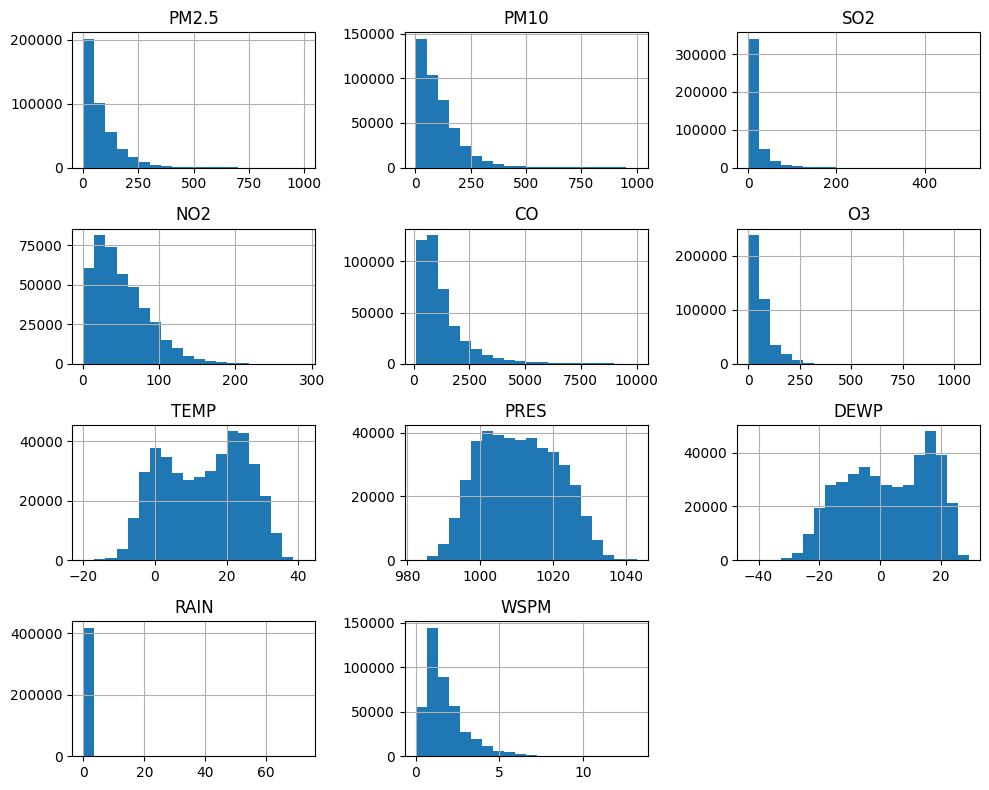

In [13]:
df_interpolated[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

Eksplorasi data numerikal

In [14]:
skewness = df_interpolated.select_dtypes(include=['float64', 'int64']).skew()
print(skewness)

No        0.000000
PM2.5     2.020293
PM10      1.927315
SO2       3.180969
NO2       1.050586
CO        2.631076
O3        1.714738
TEMP     -0.103396
PRES      0.105611
DEWP     -0.186903
RAIN     30.056198
WSPM      1.625930
dtype: float64


Eksplorasi korelasi ( EDA Multivariate ) untuk data non-numerik

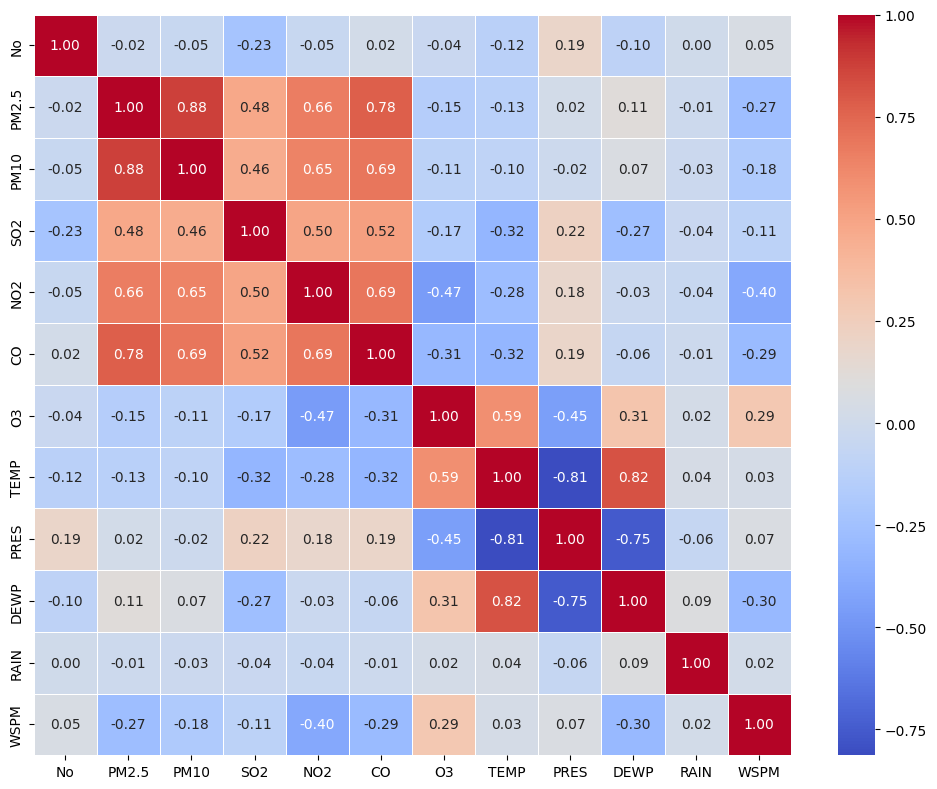

In [17]:
df_numeric = df_interpolated.select_dtypes(include=['float64', 'int64'])
corr_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.tight_layout()
plt.show()

Distribusi data per stasiun

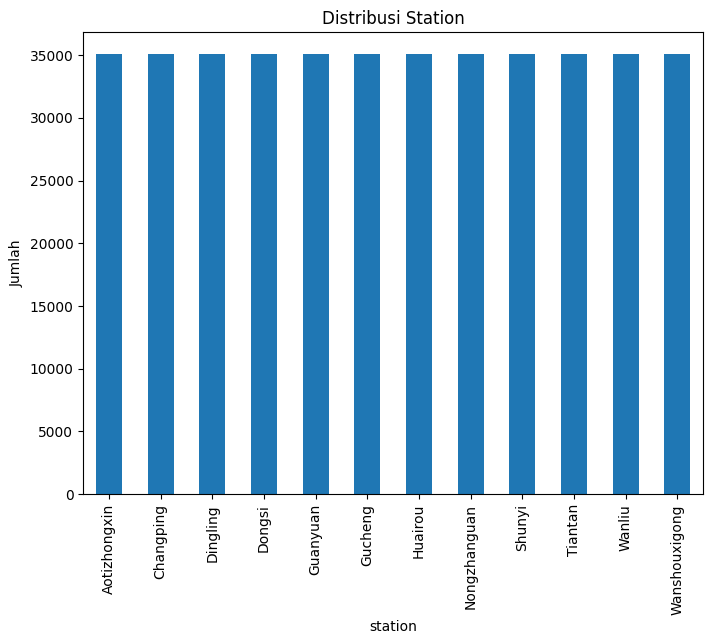

In [19]:
if 'station' in df_interpolated.columns:
    df_interpolated['station'].value_counts().plot(kind='bar', figsize=(8, 6))
    plt.title('Distribusi Station')
    plt.ylabel('Jumlah')
    plt.show()

**Insight:**
- sudah tidak terdapat data yang nilainya null ataupun duplikat
- untuk kolom Rain yang mempunyai Skewness yang tinggi, saya tidak menyesuaikannya karena curah hujan merupakan hal yang alamiah dan mungkin saja hujan turun sangat deras ataupun tidak ada hujan sama sekali
- distribusi data untuk setiap stasiun sudah merata
- PM2.5 - PM10, TEMP - DEWP dan CO - PM2.5 - NO2 memiliki korelasi yang kuat positif
- PRES - TEMP, PRES - DEWP dan O3 - NO2
memiliki korelasi yang kuat negatif
- RAIN dan O3 memiliki korelasi yang lemah antara kolom kolm lain

## Visualization & Explanatory Analysis

### Pertanyaan 1: Dimana tempat dengan kualitas udara terbaik dan terburuk ?

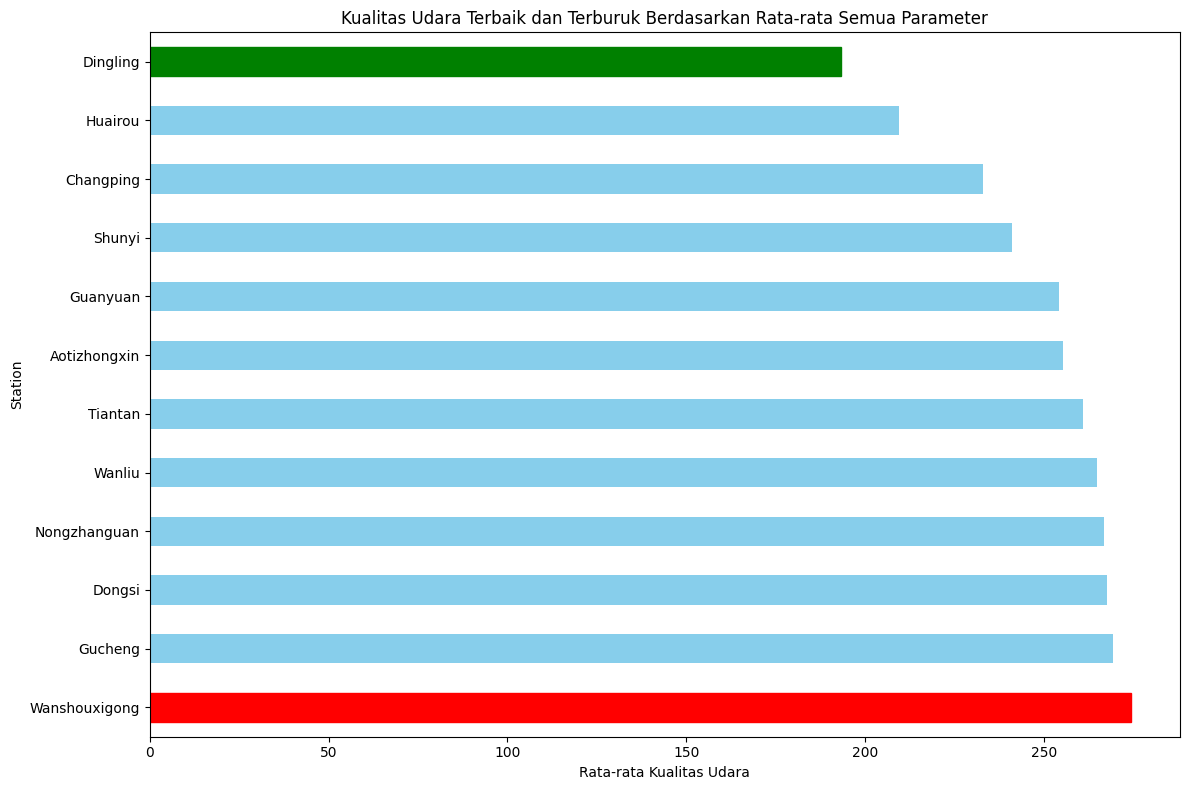

In [ ]:
columns_to_consider = ['PM2.5', 'PM10', 'SO2', 'CO', 'O3', 'WSPM']
station_avg = df_interpolated.groupby('station')[columns_to_consider].mean()

station_avg['overall_avg'] = station_avg.mean(axis=1)

station_avg_sorted = station_avg['overall_avg'].sort_values(ascending=False)

best_station = station_avg_sorted.idxmin()
worst_station = station_avg_sorted.idxmax()

plt.figure(figsize=(12, 8))
bar = station_avg_sorted.plot(kind='barh', color='skyblue')

bars = bar.patches

best_station_index = station_avg_sorted.index.get_loc(best_station)
worst_station_index = station_avg_sorted.index.get_loc(worst_station)

bars[best_station_index].set_color('green')
bars[worst_station_index].set_color('red')

plt.title('Kualitas Udara Terbaik dan Terburuk')
plt.ylabel('Station')
plt.xlabel('Rata-rata Kualitas Udara')
plt.tight_layout()

plt.show()

### Pertanyaan 2: Bagaimana Kondisi kualitas udara dari tahun ke tahun ?

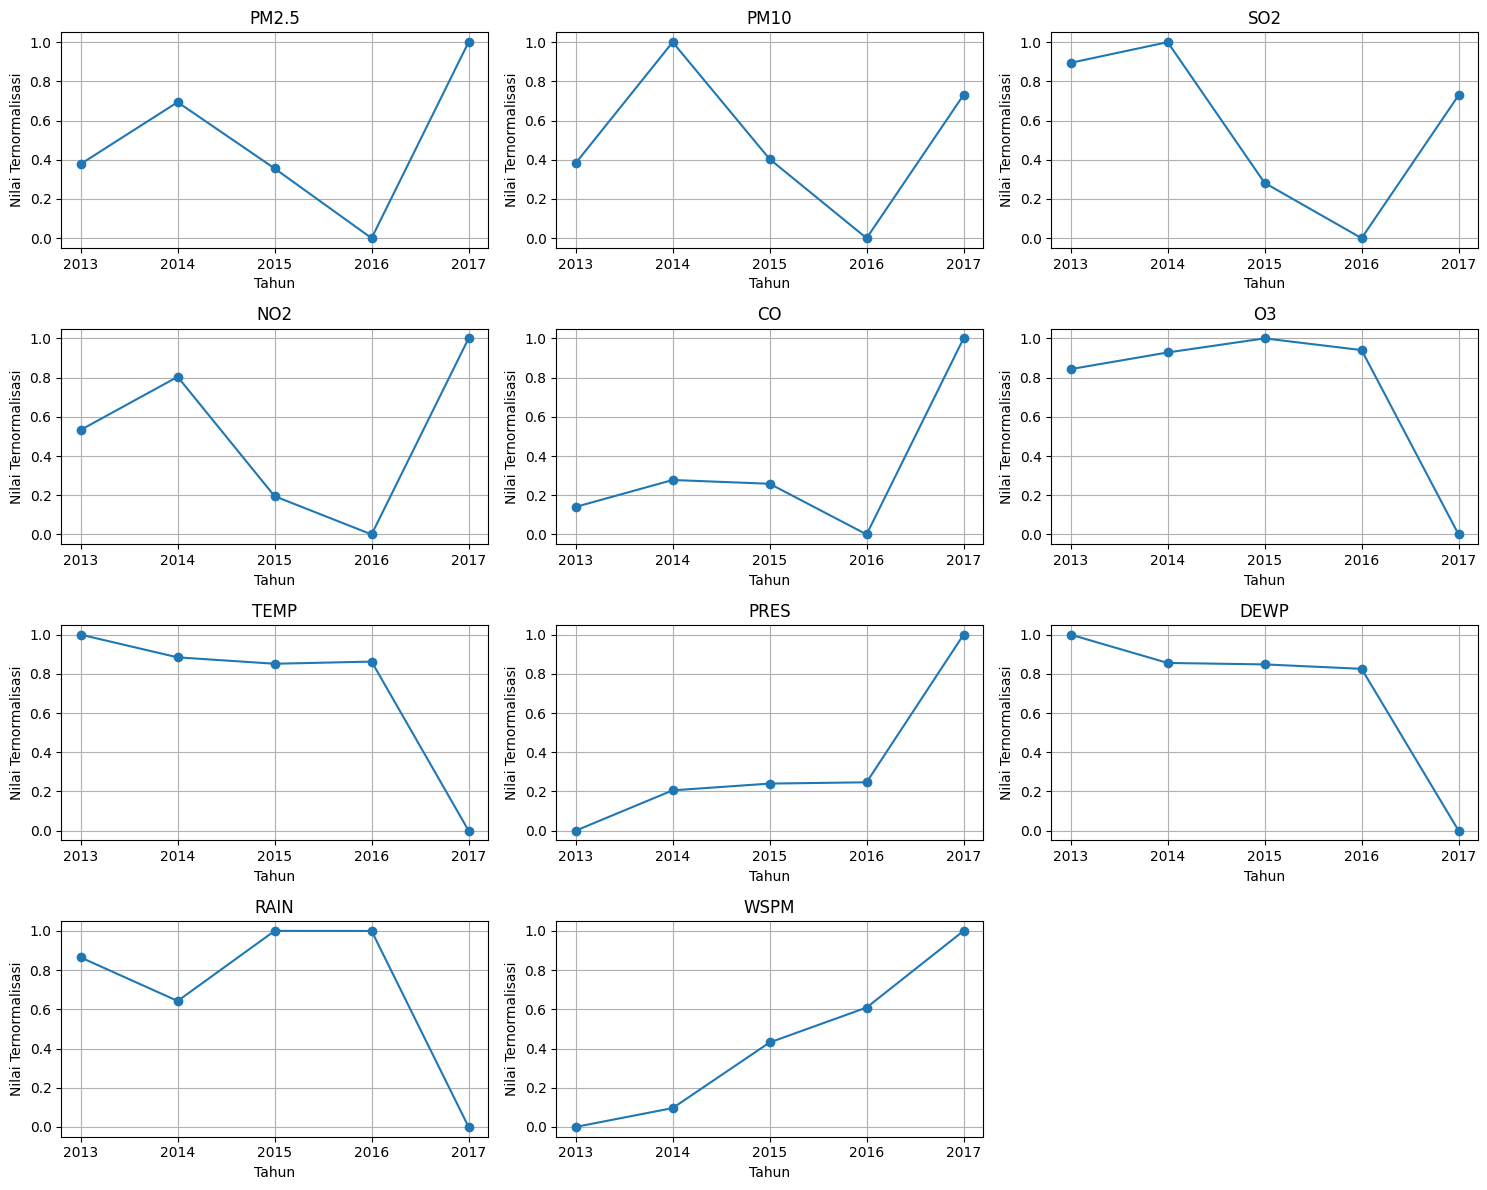

In [ ]:
df_interpolated['date'] = pd.to_datetime(df_interpolated['date'])

df_interpolated['year'] = df_interpolated['date'].dt.year

params = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
yearly_avg = df_interpolated.groupby('year')[params].mean()

yearly_avg_norm = (yearly_avg - yearly_avg.min()) / (yearly_avg.max() - yearly_avg.min())

yearly_avg_norm.index = yearly_avg_norm.index.astype(int)

n_params = len(yearly_avg_norm.columns)
ncols = 3
nrows = int(np.ceil(n_params / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*3))
axes = axes.flatten()

for i, column in enumerate(yearly_avg_norm.columns):
    axes[i].plot(yearly_avg_norm.index, yearly_avg_norm[column], marker='o', linestyle='-')
    axes[i].set_title(column)
    axes[i].set_xlabel('Tahun')
    axes[i].set_ylabel('Nilai Ternormalisasi')
    axes[i].grid(True)
    axes[i].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**
- untuk pertanyaan yang pertama, yaitu "Dimana tempat dengan kualitas udara terbaik dan terburuk ?" berikut adalah horizontal bar chart yang mengambil rata rata dari semua parameter untuk setiap station dan dibandingkan untuk mencari tempat dengan kualitas udara terbaik dan terburuk
- untuk pertanyaan yang kedua, yaitu "Bagaimana Kondisi kualitas udara dari tahun ke tahun ?" berikut adalah line chart untuk melihat perubahan kualitas udara di setiap tahunya

## Analisis Lanjutan (Opsional)

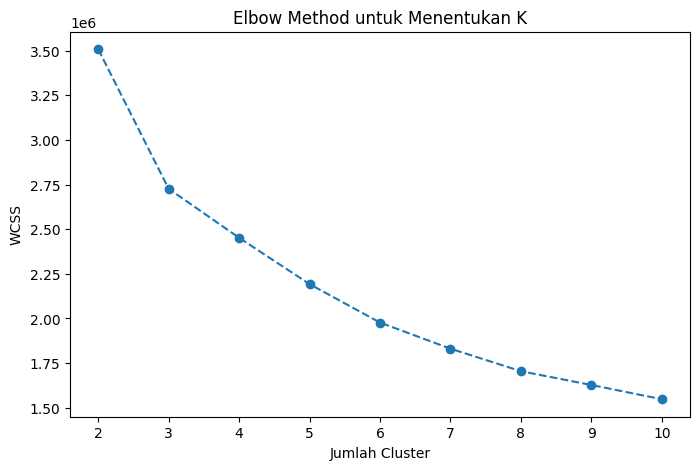

              PM2.5        PM10        SO2        NO2           CO         O3  \
Cluster                                                                         
0         65.692833   90.092353   8.204656  39.856529   879.535119  85.626565   
1         34.556014   55.751398  11.835952  38.058217   777.028651  40.169259   
2        195.474344  229.108534  42.206408  99.473608  2932.265606  17.593638   

              TEMP         PRES       DEWP      RAIN      WSPM  
Cluster                                                         
0        23.448779  1002.320692  13.910779  0.124378  1.617601  
1         4.559963  1019.706121 -10.646605  0.014023  2.222513  
2         5.046369  1015.608542  -2.322701  0.006309  1.129704  


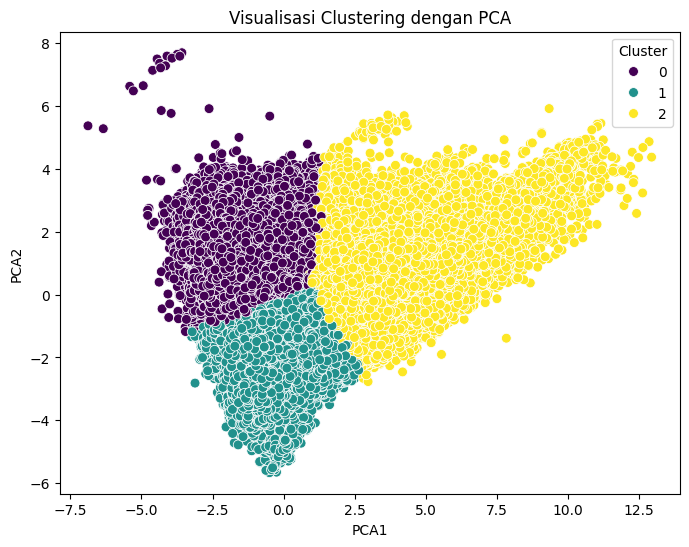

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

df = df_interpolated.copy()

features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
df_cluster = df[features]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.title('Elbow Method untuk Menentukan K')
plt.show()

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

cluster_summary = df.groupby('Cluster')[features].mean()
print(cluster_summary)

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=50)
plt.title('Visualisasi Clustering dengan PCA')
plt.show()


**insight**
- Elbhow method digunakan untuk penentuan jumlah cluster yang optimal
- Clustering kualitas udara untuk mengelompokkan kondisi kualitas udara berdasarkan suhu, tekanan udara, kecepatan angin, curah hujan dan lain lain untuk menganalisis pola dan mengidentifikasi anomali.

## Conclusion

Kesimpulan dari analisis data air quality ini adalah Dingling memiliki kualitas udara terbaik dari tahun 2013 sampai 2017, kualiatas udara untuk hampir setiap stasiun menurun dan memburuk. Sebenarnya masih banyak faktor lain kenapa kualitas udara menurun seperti aktivitas industri dan polusi dari kendaraan bermotor, saya rekomendasikan untuk memperluas pencarian data dan juga melakukan pembaruan data secara berkala untuk hasil yang lebih akurat.